Using the data analytics tools and techniques learnt from the lectures, you are required to apply different techniques related to descriptive and predictive analytics on the integrated dataset. 

You will also be required to develop a prediction model using one linear regression technique, one clustering technique and one classification technique. 

The assignment deliverables will consist of the following: 

001 - A report containing: 

      a. Definition of, at least, two different hypotheses based on the current dataset; 

      b. Explanation and justification for any cleaning/integration technique used in the dataset; 

      c. Analysis and interpretation of results using descriptive analytics; 

     d. Implementation of a prediction model using one linear regression technique, one clustering technique and one classification        technique; 

     e. Critical review of the data analytics tools and techniques used. You have to analyse the effectiveness of the techniques you have used, discuss alternative solutions and compare strengths and weaknesses between them; 

    f. Critical review of the visualisation tools used. You have to analyse the effectiveness of the visualisation tools you have used, discuss alternative solutions and compare strengths and weaknesses between them; 

   g. References and citations to support the analysis made in the report. 



002 - Uploaded to Moodle  containing

   a.  R code supporting the report provided. The R code has to provide all the code used for cleaning, integrating, analysing, visualising and creating the models proposed and discussed in the report

```
-- Dataset Merging and Preperation (Dataset Pre-processing)
    -- Data Cleaning (Dataset Pre-processing)

-- Data Exploration
   -- Explore the in-consistent months
   
-- Descriptive Data Analytics
    -- Data Sampling & Visualisation 
    
-- Diagnostic Data Analytics
    -- Covariance + Correlation
    
-- Predictive Data Analytics 
    (Linear Regression, Time Series, Classification, Clustering)

-- Prescriptive Data Analytics
```

In [321]:
# install.packages('hash')
# install.packages('tidyverse')
# install.packages('zoo')
# install.packages("skimr")
# install.packages("devtools")
# devtools::install_github("ropensci/visdat")
# install.packages("DataExplorer")
# install.packages("inspectdf")
# install.packages("ggcorrplot")
# install.packages("corrplot")

In [322]:
library(readr)
library(hash)
library(tidyverse)
library(data.table)
library(zoo)
library(dplyr)
library(ggmap)
library(skimr)
library(devtools)
library(visdat)
library(DataExplorer)
library(inspectdf)
library(ggplot2)
library(ggcorrplot)
library(corrplot)

# Dataset Integration

In [323]:
get_all_files_from_directories <- function () {
    files <- hash()

    files["2014"] <- list.files("dataset/2014", pattern=".csv")
    files["2015"] <- list.files("dataset/2015", pattern=".csv")
    files["2016"] <- list.files("dataset/2016", pattern=".csv")
    files["2017"] <- list.files("dataset/2017", pattern=".csv")
    files["2018"] <- list.files("dataset/2018", pattern=".csv")
  
    return(files)
}

In [324]:
get_all_files_from_directories()

<hash> containing 5 key-value pair(s).
  2014 : principal_offence_category_april_2014.csv     principal_offence_category_august_2014.csv    principal_offence_category_december_2014.csv  principal_offence_category_february_2014.csv  principal_offence_category_january_2014.csv   principal_offence_category_july_2014.csv      principal_offence_category_june_2014.csv      principal_offence_category_march_2014.csv     principal_offence_category_may_2014.csv       principal_offence_category_november_2014.csv  principal_offence_category_october_2014.csv   principal_offence_category_september_2014.csv
  2015 : principal_offence_category_april_2015.csv     principal_offence_category_august_2015.csv    principal_offence_category_december_2015.csv  principal_offence_category_february_2015.csv  principal_offence_category_january_2015.csv   principal_offence_category_july_2015.csv      principal_offence_category_june_2015.csv      principal_offence_category_march_2015.csv     principal_offence_categ

In [325]:
merge_files <- function(hash) {
    year <- names(hash)

    combined_df <- do.call(rbind, lapply(year, function(y) {
    do.call(rbind, lapply(hash[[y]], function(f) {
        f_name <- paste("dataset/", y, "/", f, sep="")
            df <- read.csv(f_name, stringsAsFactors = FALSE)
            df$year <- y
            df$month <- tolower(gsub(".csv", "", as.list(strsplit(f, "_")[[1]])[4]))
            df
    }))
  }))
  return(combined_df)
}

In [326]:
combined_df = merge_files(get_all_files_from_directories())

In [327]:
head(combined_df)

,X,Number.of.Homicide.Convictions,Percentage.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Percentage.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Percentage.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Percentage.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,⋯,Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Percentage.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Number.of.Motoring.Offences.Convictions,Percentage.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Percentage.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,Percentage.of.L.Motoring.Offences.Unsuccessful,year,month
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,National,81,85.3%,14,14.7%,"7,805",74.1%,"2,722",25.9%,698,⋯,513,16.3%,"8,283",86.3%,"1,314",13.7%,718,100.0%,2014,april
2,Avon and Somerset,1,100.0%,0,0.0%,167,78.8%,45,21.2%,36,⋯,16,19.5%,188,83.6%,37,16.4%,24,100.0%,2014,april
3,Bedfordshire,0,-,0,-,69,75.0%,23,25.0%,5,⋯,6,35.3%,40,88.9%,5,11.1%,16,100.0%,2014,april
4,Cambridgeshire,0,-,0,-,99,81.1%,23,18.9%,6,⋯,2,25.0%,79,92.9%,6,7.1%,4,100.0%,2014,april
5,Cheshire,1,50.0%,1,50.0%,140,74.9%,47,25.1%,17,⋯,6,10.7%,209,94.6%,12,5.4%,1,100.0%,2014,april
6,Cleveland,0,-,0,-,85,67.5%,41,32.5%,11,⋯,5,15.2%,124,87.9%,17,12.1%,10,100.0%,2014,april


In [328]:
write.csv(combined_df, "dataset/merged-data.csv", row.names=FALSE)

# Data Cleaning

In [329]:
combined_df <- read.csv("dataset/merged-data.csv")

In [330]:
glimpse(combined_df)

Rows: 2,193
Columns: 53
$ X                                                                  <chr> "Na…
$ Number.of.Homicide.Convictions                                     <int> 81,…
$ Percentage.of.Homicide.Convictions                                 <chr> "85…
$ Number.of.Homicide.Unsuccessful                                    <int> 14,…
$ Percentage.of.Homicide.Unsuccessful                                <chr> "14…
$ Number.of.Offences.Against.The.Person.Convictions                  <chr> "7,…
$ Percentage.of.Offences.Against.The.Person.Convictions              <chr> "74…
$ Number.of.Offences.Against.The.Person.Unsuccessful                 <chr> "2,…
$ Percentage.of.Offences.Against.The.Person.Unsuccessful             <chr> "25…
$ Number.of.Sexual.Offences.Convictions                              <chr> "69…
$ Percentage.of.Sexual.Offences.Convictions                          <chr> "72…
$ Number.of.Sexual.Offences.Unsuccessful                             <int> 269…
$ Percentage.of.

In [331]:
drop_percentage_columns <- function(dataframe) {
  col_names <- colnames(dataframe)
  to_drop <- grep("Percentage", col_names, value = TRUE)
  dataframe <- dataframe[, !(col_names %in% to_drop)]
  return(dataframe)
}

In [332]:
combined_df = drop_percentage_columns(combined_df)

In [333]:
head(combined_df)

,X,Number.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,Number.of.Sexual.Offences.Unsuccessful,Number.of.Burglary.Convictions,Number.of.Burglary.Unsuccessful,Number.of.Robbery.Convictions,⋯,Number.of.Drugs.Offences.Unsuccessful,Number.of.Public.Order.Offences.Convictions,Number.of.Public.Order.Offences.Unsuccessful,Number.of.All.Other.Offences..excluding.Motoring..Convictions,Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Number.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,year,month
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>
1,National,81,14,"7,805","2,722",698,269,"1,470",226,517,⋯,279,"3,549",654,"2,640",513,"8,283","1,314",718,2014,april
2,Avon and Somerset,1,0,167,45,36,8,37,2,9,⋯,2,68,11,66,16,188,37,24,2014,april
3,Bedfordshire,0,0,69,23,5,1,16,1,4,⋯,2,29,6,11,6,40,5,16,2014,april
4,Cambridgeshire,0,0,99,23,6,3,8,0,6,⋯,2,45,9,6,2,79,6,4,2014,april
5,Cheshire,1,1,140,47,17,3,26,3,1,⋯,10,86,7,50,6,209,12,1,2014,april
6,Cleveland,0,0,85,41,11,4,25,10,5,⋯,7,74,27,28,5,124,17,10,2014,april


In [334]:
sort_by_yearmon <- function(dataframe){
  dataframe$yearmon <- as.Date(paste(dataframe$year, dataframe$month, "01", sep = "-"), "%Y-%b-%d")
  dataframe <- dataframe[order(dataframe$yearmon),]
  return(dataframe)
}

In [335]:
combined_df <- sort_by_yearmon(combined_df)

In [336]:
head(combined_df)

,X,Number.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,Number.of.Sexual.Offences.Unsuccessful,Number.of.Burglary.Convictions,Number.of.Burglary.Unsuccessful,Number.of.Robbery.Convictions,⋯,Number.of.Public.Order.Offences.Convictions,Number.of.Public.Order.Offences.Unsuccessful,Number.of.All.Other.Offences..excluding.Motoring..Convictions,Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Number.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful,year,month,yearmon
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,⋯,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<date>
173,National,51,11,"9,087","2,930",736,286,"1,715",284,522,⋯,"4,752",797,"3,291",586,"12,945","1,466",890,2014,january,2014-01-01
174,Avon and Somerset,0,0,228,62,35,17,49,1,8,⋯,123,28,63,9,256,40,20,2014,january,2014-01-01
175,Bedfordshire,0,1,68,29,2,1,7,4,16,⋯,30,9,13,2,171,13,12,2014,january,2014-01-01
176,Cambridgeshire,0,0,101,21,10,3,18,4,6,⋯,37,2,28,9,103,16,14,2014,january,2014-01-01
177,Cheshire,0,0,170,40,15,1,38,5,10,⋯,77,8,50,5,264,16,13,2014,january,2014-01-01
178,Cleveland,2,3,119,44,11,6,36,2,3,⋯,123,27,34,14,228,16,3,2014,january,2014-01-01


In [337]:
shift_columns <- function(dataframe){
  cols <- colnames(dataframe)
  cols <- c(cols[1], cols[(length(cols)-2):length(cols)], cols[2:(length(cols)-3)])
  dataframe[, cols]
}

In [338]:
combined_df <- shift_columns(combined_df)

In [339]:
head(combined_df)

,X,year,month,yearmon,Number.of.Homicide.Convictions,Number.of.Homicide.Unsuccessful,Number.of.Offences.Against.The.Person.Convictions,Number.of.Offences.Against.The.Person.Unsuccessful,Number.of.Sexual.Offences.Convictions,Number.of.Sexual.Offences.Unsuccessful,⋯,Number.of.Criminal.Damage.Unsuccessful,Number.of.Drugs.Offences.Convictions,Number.of.Drugs.Offences.Unsuccessful,Number.of.Public.Order.Offences.Convictions,Number.of.Public.Order.Offences.Unsuccessful,Number.of.All.Other.Offences..excluding.Motoring..Convictions,Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful,Number.of.Motoring.Offences.Convictions,Number.of.Motoring.Offences.Unsuccessful,Number.of.Admin.Finalised.Unsuccessful
,<chr>,<int>,<chr>,<date>,<int>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
173,National,2014,january,2014-01-01,51,11,"9,087","2,930",736,286,⋯,472,"4,988",305,"4,752",797,"3,291",586,"12,945","1,466",890
174,Avon and Somerset,2014,january,2014-01-01,0,0,228,62,35,17,⋯,14,148,4,123,28,63,9,256,40,20
175,Bedfordshire,2014,january,2014-01-01,0,1,68,29,2,1,⋯,8,31,3,30,9,13,2,171,13,12
176,Cambridgeshire,2014,january,2014-01-01,0,0,101,21,10,3,⋯,3,47,1,37,2,28,9,103,16,14
177,Cheshire,2014,january,2014-01-01,0,0,170,40,15,1,⋯,3,64,3,77,8,50,5,264,16,13
178,Cleveland,2014,january,2014-01-01,2,3,119,44,11,6,⋯,13,65,2,123,27,34,14,228,16,3


In [340]:
rename_columns <- function(dataframe){
  colnames(dataframe) <- gsub("Number.of.", "", colnames(dataframe))
  colnames(dataframe) <- gsub("\\.", "_", colnames(dataframe))
  colnames(dataframe) <- tolower(colnames(dataframe))
  return(dataframe)
}

In [341]:
combined_df <- rename_columns(combined_df)

In [342]:
head(combined_df)

,x,year,month,yearmon,homicide_convictions,homicide_unsuccessful,offences_against_the_person_convictions,offences_against_the_person_unsuccessful,sexual_offences_convictions,sexual_offences_unsuccessful,⋯,criminal_damage_unsuccessful,drugs_offences_convictions,drugs_offences_unsuccessful,public_order_offences_convictions,public_order_offences_unsuccessful,all_other_offences__excluding_motoring__convictions,all_other_offences__excluding_motoring__unsuccessful,motoring_offences_convictions,motoring_offences_unsuccessful,admin_finalised_unsuccessful
,<chr>,<int>,<chr>,<date>,<int>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
173,National,2014,january,2014-01-01,51,11,"9,087","2,930",736,286,⋯,472,"4,988",305,"4,752",797,"3,291",586,"12,945","1,466",890
174,Avon and Somerset,2014,january,2014-01-01,0,0,228,62,35,17,⋯,14,148,4,123,28,63,9,256,40,20
175,Bedfordshire,2014,january,2014-01-01,0,1,68,29,2,1,⋯,8,31,3,30,9,13,2,171,13,12
176,Cambridgeshire,2014,january,2014-01-01,0,0,101,21,10,3,⋯,3,47,1,37,2,28,9,103,16,14
177,Cheshire,2014,january,2014-01-01,0,0,170,40,15,1,⋯,3,64,3,77,8,50,5,264,16,13
178,Cleveland,2014,january,2014-01-01,2,3,119,44,11,6,⋯,13,65,2,123,27,34,14,228,16,3


In [343]:
remove_special_characters_and_convert_to_integer <- function(dataframe){
  dataframe <- dataframe %>% 
    mutate_all(funs(gsub(",", "", .)))
  dataframe[,5:ncol(dataframe)] <- sapply(dataframe[,5:ncol(dataframe)], as.integer)
  return(dataframe)
}

In [344]:
combined_df <- remove_special_characters_and_convert_to_integer(combined_df)

In [345]:
head(combined_df)

,x,year,month,yearmon,homicide_convictions,homicide_unsuccessful,offences_against_the_person_convictions,offences_against_the_person_unsuccessful,sexual_offences_convictions,sexual_offences_unsuccessful,⋯,criminal_damage_unsuccessful,drugs_offences_convictions,drugs_offences_unsuccessful,public_order_offences_convictions,public_order_offences_unsuccessful,all_other_offences__excluding_motoring__convictions,all_other_offences__excluding_motoring__unsuccessful,motoring_offences_convictions,motoring_offences_unsuccessful,admin_finalised_unsuccessful
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
173,National,2014,january,2014-01-01,51,11,9087,2930,736,286,⋯,472,4988,305,4752,797,3291,586,12945,1466,890
174,Avon and Somerset,2014,january,2014-01-01,0,0,228,62,35,17,⋯,14,148,4,123,28,63,9,256,40,20
175,Bedfordshire,2014,january,2014-01-01,0,1,68,29,2,1,⋯,8,31,3,30,9,13,2,171,13,12
176,Cambridgeshire,2014,january,2014-01-01,0,0,101,21,10,3,⋯,3,47,1,37,2,28,9,103,16,14
177,Cheshire,2014,january,2014-01-01,0,0,170,40,15,1,⋯,3,64,3,77,8,50,5,264,16,13
178,Cleveland,2014,january,2014-01-01,2,3,119,44,11,6,⋯,13,65,2,123,27,34,14,228,16,3


In [346]:
unique(combined_df$month)

[1] "january"   "february"  "march"     "april"     "may"       "june"     
 [7] "july"      "august"    "september" "october"   "november"  "december" 
[13] "jul"       "aug"       "sep"       "oct"       "nov"       "dec"      
[19] "jan"       "feb"       "mar"

In [347]:
convert_months <- function(df){
  df$month <- gsub("january", "jan", df$month)
  df$month <- gsub("february", "feb", df$month)
  df$month <- gsub( "march", "mar",df$month)
  df$month <- gsub("april", "apr", df$month)
  df$month <- gsub( "may", "may", df$month)
  df$month <- gsub("june","jun",  df$month)
  df$month <- gsub( "july", "jul",df$month)
  df$month <- gsub("august","aug",  df$month)
  df$month <- gsub("september", "sep", df$month)
  df$month <- gsub( "october","oct", df$month)
  df$month <- gsub("november", "nov", df$month)
  df$month <- gsub("december","dec",  df$month)
  return(df)
}

In [348]:
combined_df <- convert_months(combined_df)

In [349]:
head(combined_df)

,x,year,month,yearmon,homicide_convictions,homicide_unsuccessful,offences_against_the_person_convictions,offences_against_the_person_unsuccessful,sexual_offences_convictions,sexual_offences_unsuccessful,⋯,criminal_damage_unsuccessful,drugs_offences_convictions,drugs_offences_unsuccessful,public_order_offences_convictions,public_order_offences_unsuccessful,all_other_offences__excluding_motoring__convictions,all_other_offences__excluding_motoring__unsuccessful,motoring_offences_convictions,motoring_offences_unsuccessful,admin_finalised_unsuccessful
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
173,National,2014,jan,2014-01-01,51,11,9087,2930,736,286,⋯,472,4988,305,4752,797,3291,586,12945,1466,890
174,Avon and Somerset,2014,jan,2014-01-01,0,0,228,62,35,17,⋯,14,148,4,123,28,63,9,256,40,20
175,Bedfordshire,2014,jan,2014-01-01,0,1,68,29,2,1,⋯,8,31,3,30,9,13,2,171,13,12
176,Cambridgeshire,2014,jan,2014-01-01,0,0,101,21,10,3,⋯,3,47,1,37,2,28,9,103,16,14
177,Cheshire,2014,jan,2014-01-01,0,0,170,40,15,1,⋯,3,64,3,77,8,50,5,264,16,13
178,Cleveland,2014,jan,2014-01-01,2,3,119,44,11,6,⋯,13,65,2,123,27,34,14,228,16,3


In [350]:
get_missing_months <- function(dataframe){
  years <- unique(dataframe$year)
  missing_months <- list()
  

  for (year in years){
    months <- unique(dataframe[dataframe$year == year,]$month)
    all_months <- c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")
    diff <- setdiff(all_months, months)
    missing_months[[year]] <- diff
  }
  
  return(missing_months)
}

In [351]:
get_missing_months(combined_df)

$`2014`
character(0)

$`2015`
[1] "nov"

$`2016`
[1] "feb" "mar"

$`2017`
[1] "apr" "may" "jun"

$`2018`
[1] "apr" "may" "jun"

In [352]:
unique(combined_df$x)

[1] "National"              "Avon and Somerset"     "Bedfordshire"         
 [4] "Cambridgeshire"        "Cheshire"              "Cleveland"            
 [7] "Cumbria"               "Derbyshire"            "Devon and Cornwall"   
[10] "Dorset"                "Durham"                "Dyfed Powys"          
[13] "Essex"                 "Gloucestershire"       "GreaterManchester"    
[16] "Gwent"                 "Hampshire"             "Hertfordshire"        
[19] "Humberside"            "Kent"                  "Lancashire"           
[22] "Leicestershire"        "Lincolnshire"          "Merseyside"           
[25] "Metropolitan and City" "Norfolk"               "Northamptonshire"     
[28] "Northumbria"           "North Wales"           "North Yorkshire"      
[31] "Nottinghamshire"       "South Wales"           "South Yorkshire"      
[34] "Staffordshire"         "Suffolk"               "Surrey"               
[37] "Sussex"                "Thames Valley"         "Warwickshire"         
[40] "West Mercia"           "West Midlands"         "West Yorkshire"       
[43] "Wiltshire"

In [353]:
county_region_map <- list(
  "National" = "All",
  "Avon and Somerset" = "West",
  "Bedfordshire" = "East",
  "Cambridgeshire" = "East",
  "Cheshire" = "North",
  "Cleveland" = "North",
  "Cumbria" = "North",
  "Derbyshire" = "East",
  "Devon and Cornwall" = "West",
  "Dorset" = "West",
  "Durham" = "North",
  "Dyfed Powys" = "West",
  "Essex" = "East",
  "Gloucestershire" = "West",
  "GreaterManchester" = "North",
  "Gwent" = "West",
  "Hampshire" = "South",
  "Hertfordshire" = "East",
  "Humberside" = "North",
  "Kent" = "South",
  "Lancashire" = "North",
  "Leicestershire" = "East",
  "Lincolnshire" = "East",
  "Merseyside" = "North",
  "Metropolitan and City" = "South",
  "Norfolk" = "East",
  "Northamptonshire" = "East",
  "Northumbria" = "North",
  "North Wales" = "North",
  "North Yorkshire" = "North",
  "Nottinghamshire" = "East",
  "South Wales" = "West",
  "South Yorkshire" = "North",
  "Staffordshire" = "West",
  "Suffolk" = "East",
  "Surrey" = "South",
  "Sussex" = "South",
  "Thames Valley" = "South",
  "Warwickshire" = "West",
  "West Mercia" = "West",
  "West Midlands" = "West",
  "West Yorkshire" = "North",
  "Wiltshire" = "West"
)

In [354]:
label_county_region <- function(df, county_region) {  
  region <- c()

  for (i in 1:nrow(df)) {
    county <- df$x[i]
    region[i] <- county_region[[county]]
  }
  
  df$region <- region
  
  return(df)
}

In [355]:
combined_df <- label_county_region(combined_df, county_region_map)

In [356]:
head(combined_df)

,x,year,month,yearmon,homicide_convictions,homicide_unsuccessful,offences_against_the_person_convictions,offences_against_the_person_unsuccessful,sexual_offences_convictions,sexual_offences_unsuccessful,⋯,drugs_offences_convictions,drugs_offences_unsuccessful,public_order_offences_convictions,public_order_offences_unsuccessful,all_other_offences__excluding_motoring__convictions,all_other_offences__excluding_motoring__unsuccessful,motoring_offences_convictions,motoring_offences_unsuccessful,admin_finalised_unsuccessful,region
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
173,National,2014,jan,2014-01-01,51,11,9087,2930,736,286,⋯,4988,305,4752,797,3291,586,12945,1466,890,All
174,Avon and Somerset,2014,jan,2014-01-01,0,0,228,62,35,17,⋯,148,4,123,28,63,9,256,40,20,West
175,Bedfordshire,2014,jan,2014-01-01,0,1,68,29,2,1,⋯,31,3,30,9,13,2,171,13,12,East
176,Cambridgeshire,2014,jan,2014-01-01,0,0,101,21,10,3,⋯,47,1,37,2,28,9,103,16,14,East
177,Cheshire,2014,jan,2014-01-01,0,0,170,40,15,1,⋯,64,3,77,8,50,5,264,16,13,North
178,Cleveland,2014,jan,2014-01-01,2,3,119,44,11,6,⋯,65,2,123,27,34,14,228,16,3,North


In [357]:
unique(combined_df$region)

[1] "All"   "West"  "East"  "North" "South"

In [358]:
move_last_column_to_5th <- function(dataframe) {
  ncols <- ncol(dataframe)
  region <- dataframe[, ncols]
  dataframe <- dataframe[, -ncols]
  dataframe <- cbind(dataframe[, 1:4], region, dataframe[, 5:(ncols-1)])
  return(dataframe)
}

In [359]:
combined_df <- move_last_column_to_5th(combined_df)

In [360]:
head(combined_df)

,x,year,month,yearmon,region,homicide_convictions,homicide_unsuccessful,offences_against_the_person_convictions,offences_against_the_person_unsuccessful,sexual_offences_convictions,⋯,criminal_damage_unsuccessful,drugs_offences_convictions,drugs_offences_unsuccessful,public_order_offences_convictions,public_order_offences_unsuccessful,all_other_offences__excluding_motoring__convictions,all_other_offences__excluding_motoring__unsuccessful,motoring_offences_convictions,motoring_offences_unsuccessful,admin_finalised_unsuccessful
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
173,National,2014,jan,2014-01-01,All,51,11,9087,2930,736,⋯,472,4988,305,4752,797,3291,586,12945,1466,890
174,Avon and Somerset,2014,jan,2014-01-01,West,0,0,228,62,35,⋯,14,148,4,123,28,63,9,256,40,20
175,Bedfordshire,2014,jan,2014-01-01,East,0,1,68,29,2,⋯,8,31,3,30,9,13,2,171,13,12
176,Cambridgeshire,2014,jan,2014-01-01,East,0,0,101,21,10,⋯,3,47,1,37,2,28,9,103,16,14
177,Cheshire,2014,jan,2014-01-01,North,0,0,170,40,15,⋯,3,64,3,77,8,50,5,264,16,13
178,Cleveland,2014,jan,2014-01-01,North,2,3,119,44,11,⋯,13,65,2,123,27,34,14,228,16,3


In [361]:
names(combined_df)[names(combined_df) == "x"] <- "county"

In [362]:
rename_conviction_columns <- function(dataframe){
  col_names <- colnames(dataframe)
  for (i in 1:length(col_names)){
    if (grepl("_convictions", col_names[i])){
      names(dataframe)[names(dataframe) == col_names[i]] <- gsub("_convictions", "" ,col_names[i])
    }else{
      names(dataframe)[names(dataframe) == col_names[i]] <- gsub("_unsuccessful", "_us" ,col_names[i])
    }
  }
  return(dataframe)
}

In [363]:
combined_df <- rename_conviction_columns(combined_df)

In [364]:
head(combined_df)

,county,year,month,yearmon,region,homicide,homicide_us,offences_against_the_person,offences_against_the_person_us,sexual_offences,⋯,criminal_damage_us,drugs_offences,drugs_offences_us,public_order_offences,public_order_offences_us,all_other_offences__excluding_motoring_,all_other_offences__excluding_motoring__us,motoring_offences,motoring_offences_us,admin_finalised_us
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
173,National,2014,jan,2014-01-01,All,51,11,9087,2930,736,⋯,472,4988,305,4752,797,3291,586,12945,1466,890
174,Avon and Somerset,2014,jan,2014-01-01,West,0,0,228,62,35,⋯,14,148,4,123,28,63,9,256,40,20
175,Bedfordshire,2014,jan,2014-01-01,East,0,1,68,29,2,⋯,8,31,3,30,9,13,2,171,13,12
176,Cambridgeshire,2014,jan,2014-01-01,East,0,0,101,21,10,⋯,3,47,1,37,2,28,9,103,16,14
177,Cheshire,2014,jan,2014-01-01,North,0,0,170,40,15,⋯,3,64,3,77,8,50,5,264,16,13
178,Cleveland,2014,jan,2014-01-01,North,2,3,119,44,11,⋯,13,65,2,123,27,34,14,228,16,3


In [365]:
glimpse(combined_df)

Rows: 2,193
Columns: 30
$ county                                     <chr> "National", "Avon and Somer…
$ year                                       <chr> "2014", "2014", "2014", "20…
$ month                                      <chr> "jan", "jan", "jan", "jan",…
$ yearmon                                    <chr> "2014-01-01", "2014-01-01",…
$ region                                     <chr> "All", "West", "East", "Eas…
$ homicide                                   <int> 51, 0, 0, 0, 0, 2, 0, 0, 0,…
$ homicide_us                                <int> 11, 0, 1, 0, 0, 3, 0, 1, 0,…
$ offences_against_the_person                <int> 9087, 228, 68, 101, 170, 11…
$ offences_against_the_person_us             <int> 2930, 62, 29, 21, 40, 44, 1…
$ sexual_offences                            <int> 736, 35, 2, 10, 15, 11, 4, …
$ sexual_offences_us                         <int> 286, 17, 1, 3, 1, 6, 3, 7, …
$ burglary                                   <int> 1715, 49, 7, 18, 38, 36, 16…
$ burglary_us   

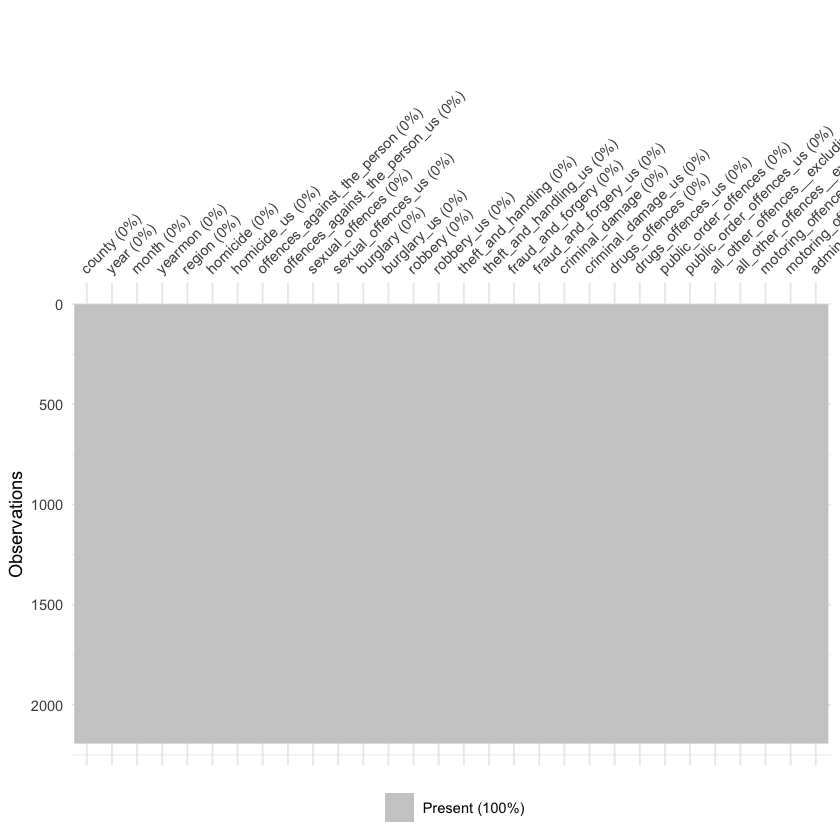

In [366]:
vis_miss(combined_df)

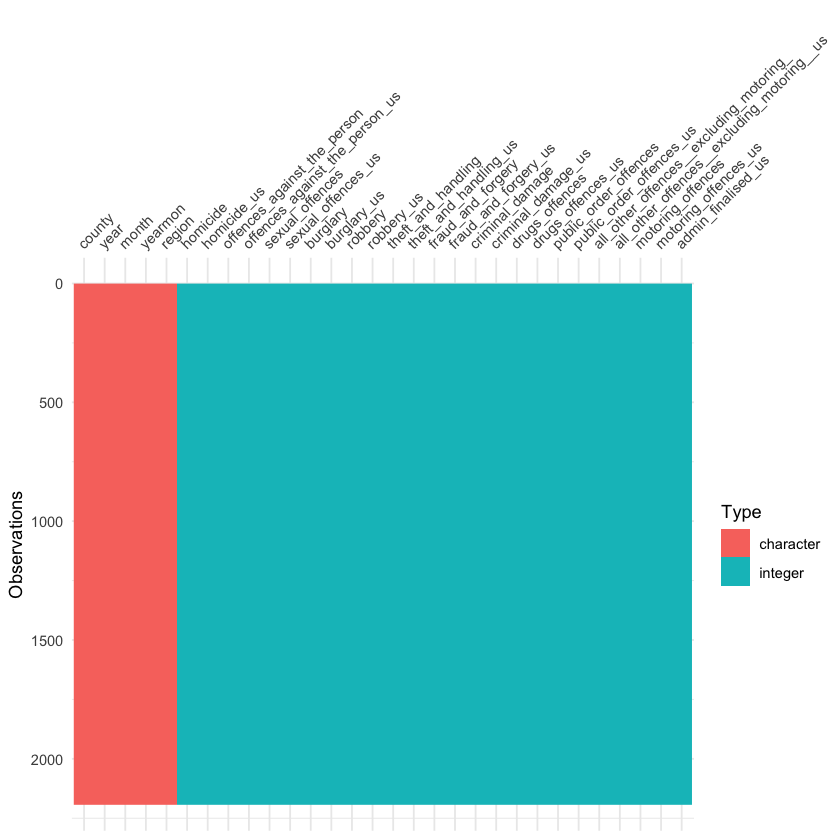

In [367]:
vis_dat(combined_df)

In [368]:
write.csv(combined_df, "dataset/cleaned-data.csv", row.names=FALSE)

# Descriptive Analytics

## Attributes Analysis

In [369]:
print_summary <- function(dataframe){
  for (i in colnames(dataframe)){
    print(i)
    print(summary(dataframe[,i]))
  }
}

In [370]:
print_summary(combined_df)

[1] "county"
   Length     Class      Mode 
     2193 character character 
[1] "year"
   Length     Class      Mode 
     2193 character character 
[1] "month"
   Length     Class      Mode 
     2193 character character 
[1] "yearmon"
   Length     Class      Mode 
     2193 character character 
[1] "region"
   Length     Class      Mode 
     2193 character character 
[1] "homicide"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   3.798   3.000 131.000 
[1] "homicide_us"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.9138  1.0000 35.0000 
[1] "offences_against_the_person"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   29.0   115.0   179.0   454.9   272.0 11741.0 
[1] "offences_against_the_person_us"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0    27.0    46.0   135.4    77.0  3568.0 
[1] "sexual_offences"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.00   15.00   43.78   29.00 1179.00 
[1] "sexual

## Analysis dependent on Regions

In [371]:
group_by_region <- function(dataframe){
  dataframe %>%
    group_by(region)
}

In [372]:
group_by_region(combined_df)

county,year,month,yearmon,region,homicide,homicide_us,offences_against_the_person,offences_against_the_person_us,sexual_offences,⋯,criminal_damage_us,drugs_offences,drugs_offences_us,public_order_offences,public_order_offences_us,all_other_offences__excluding_motoring_,all_other_offences__excluding_motoring__us,motoring_offences,motoring_offences_us,admin_finalised_us
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
National,2014,jan,2014-01-01,All,51,11,9087,2930,736,⋯,472,4988,305,4752,797,3291,586,12945,1466,890
Avon and Somerset,2014,jan,2014-01-01,West,0,0,228,62,35,⋯,14,148,4,123,28,63,9,256,40,20
Bedfordshire,2014,jan,2014-01-01,East,0,1,68,29,2,⋯,8,31,3,30,9,13,2,171,13,12
Cambridgeshire,2014,jan,2014-01-01,East,0,0,101,21,10,⋯,3,47,1,37,2,28,9,103,16,14
Cheshire,2014,jan,2014-01-01,North,0,0,170,40,15,⋯,3,64,3,77,8,50,5,264,16,13
Cleveland,2014,jan,2014-01-01,North,2,3,119,44,11,⋯,13,65,2,123,27,34,14,228,16,3
Cumbria,2014,jan,2014-01-01,North,0,0,113,13,4,⋯,3,52,1,78,2,52,5,112,7,12
Derbyshire,2014,jan,2014-01-01,East,0,1,135,58,22,⋯,12,86,9,59,15,28,12,251,9,13
Devon and Cornwall,2014,jan,2014-01-01,West,0,0,220,64,16,⋯,9,96,5,83,11,75,14,410,31,10


## Analysis dependent on County

## Analysis dependent on Years & Months

## Analysis between Crime Types

In [373]:
plot_histograms_for_all_numeric_columns <- function(dataframe){
  for (i in 1:ncol(dataframe)){
    if(is.numeric(dataframe[,i])){
      hist(dataframe[,i], main = colnames(dataframe)[i])
    }
  }
}

In [374]:
plot_histograms_for_all_numeric_columns(df)

ERROR: Error in 1:ncol(dataframe): argument of length 0


In [ ]:
plot_graphs_for_all_columns_with_yearmon <- function(dataframe){
  for (i in 1:ncol(dataframe)){
    if (is.numeric(dataframe[,i])){
      plot(dataframe$year, dataframe[,i], type="l", main=colnames(dataframe)[i])
    }
  }
}

In [ ]:
plot_graphs_for_all_columns_with_yearmon(df)

## Correlation

In [ ]:
corr_matrix_graph <- function(dataframe){
  num_cols <- sapply(dataframe, is.numeric)
  corr_matrix <- cor(dataframe[,num_cols])
  corrplot(corr_matrix, type = "upper", order = "hclust", tl.cex = 0.7, tl.col = "black", is.corr = TRUE, mar = c(0, 0, 0, 0))
}

In [ ]:
corr_matrix_graph(df)

# Covarince

In [ ]:
cov_matrix_graph <- function(dataframe){
  num_cols <- sapply(dataframe, is.numeric)
  num_cols <- names(num_cols[num_cols])
  cov_matrix <- cov(dataframe[,num_cols])
  corrplot(cov_matrix, type = "upper", order = "hclust", tl.cex = 0.7, tl.col = "black", is.corr = FALSE, mar = c(0, 0, 0, 0))
}

In [ ]:
cov_matrix_graph(df)

# Predictive Analytics

-- The rate of un-succesful crimes is increasing or decreasing every year, which imposes either the courst system is gettng better or police is geeting better.

-- A, B region has more crimes than C, D region.

-- The number of crimes increase by the end of the year as compared to the start of the year.

-- 

## Linear Regression

## Clustering

## Classification

# Prescriptive Analytics

In [ ]:
-- The number of crimes are increasing every year.

## Time Series Forecasting

Suggesting any particular month to look out for specific crime peaks and telling which ones could go down.